![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Course objective
Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [181]:
# Importing needed libraries
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt
pd.set_option('display.max_columns', None)
# Retreiving data
df_men = pd.read_csv('men_results.csv')
df_women = pd.read_csv('women_results.csv')
print(df_men.info())
print(df_women.info())
print(df_men.head())
print(df_women.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

## 1 : modify data types and subsetting

In [182]:
# looping through the dataframes to change data format and subset
framelist = [df_men, df_women]
for i, df in enumerate(framelist):
    df.drop(columns="Unnamed: 0",inplace=True)
    df['home_team'] = df['home_team'].astype('category')
    df['away_team'] = df['away_team'].astype('category')
    df['tournament'] = df['tournament'].astype('category')
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
    df = df[df['tournament'] == 'FIFA World Cup']
    df = df[df['date'] > '2002-01-01']
    df['total_score'] = df['home_score'] + df['away_score']
    if i == 0:
        df_men = df
    elif i == 1:
        df_women = df
print(len(df_men),'\n',len(df_women))

384 
 200


## 2 : Sampling from the data

pop 2.5130208333333335 
 samp 2.3875
pop 2.98 
 samp 2.8125
pop 1.6525436488378111 
 samp 1.571049395318825
pop 2.022387265401036 
 samp 1.7290792896433111


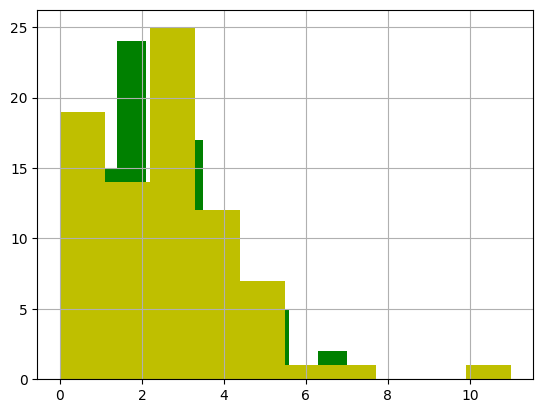

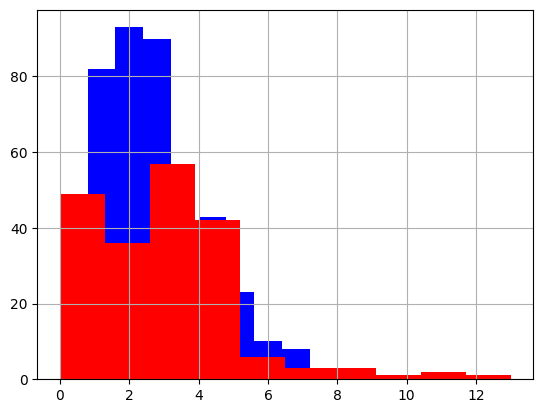

In [183]:
#trying simple sampling methods with replacment
men_sample_samp = df_men.sample(n=80,replace=False,random_state=20)
women_sample_samp = df_women.sample(n=80,replace=False,random_state=20)

#comparing means
print('pop',df_men['total_score'].mean(),'\n','samp',
      men_sample_samp['total_score'].mean())

print('pop',df_women['total_score'].mean(),'\n','samp',
      women_sample_samp['total_score'].mean())

#comparing std
print('pop',df_men['total_score'].std(),'\n','samp',
      men_sample_samp['total_score'].std(ddof=1))

print('pop',df_women['total_score'].std(),'\n','samp',
      women_sample_samp['total_score'].std(ddof=1))
# histogram to visualize the distrubition of samp
men_sample_samp['total_score'].hist(bins=10,color='g')
women_sample_samp['total_score'].hist(bins=10,color='y')
plt.show()
# histogram to visualize the distrubition of pop
df_men['total_score'].hist(bins=10,color='b')
df_women['total_score'].hist(bins=10,color='r')
plt.show()

In [184]:
# trying t-sample test
print(pingouin.ttest(x=  men_sample_samp['total_score']   ,
                    y= women_sample_samp['total_score'], 
                     alternative='less',
                     confidence = 0.90))
print(pingouin.mwu(x=  men_sample_samp['total_score']   ,
                    y= women_sample_samp['total_score'], 
                     alternative='less',
                     ))
print('             population')
print(pingouin.ttest(x=  df_men['total_score']   ,
                    y= df_women['total_score'], 
                     alternative='less',
                     confidence = 0.90))
print(pingouin.mwu(x=  df_men['total_score']   ,
                    y= df_women['total_score'], 
                     alternative='less',
                     ))
result_dict = {"p_val": 0.005107, "result": "reject"}

               T  dof alternative     p-val                        CI90%  \
T-test -1.627124  158        less  0.052852  [-inf, -0.0888570092616026]   

         cohen-d   BF10     power  
T-test  0.257271  1.152  0.490147  
      U-val alternative     p-val      RBC      CLES
MWU  2700.0        less  0.040884  0.15625  0.578125
             population
               T         dof alternative     p-val  \
T-test -2.812823  340.102801        less  0.002598   

                               CI90%   cohen-d   BF10     power  
T-test  [-inf, -0.25380448523145904]  0.261228  8.927  0.911063  
       U-val alternative     p-val       RBC      CLES
MWU  33527.0        less  0.005107  0.126901  0.563451
